In [1]:
#import library
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# **1. Load and Prepare the Data**
1.1. Load the Dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/content/diabetes.csv')


In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.shape

(768, 9)

1.2. Examine the Dataset

In [5]:
print(data.info())

print(data.head())

print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8     

1.3. Data Cleaning

In [6]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [7]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

# **2. Exploratory Data Analysis (EDA)**
2.1. Descriptive Statistics

In [8]:
print(data.describe().T)


                          count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinT

2.2. Feature Distribution
* Plot histograms for each feature to see the distribution.

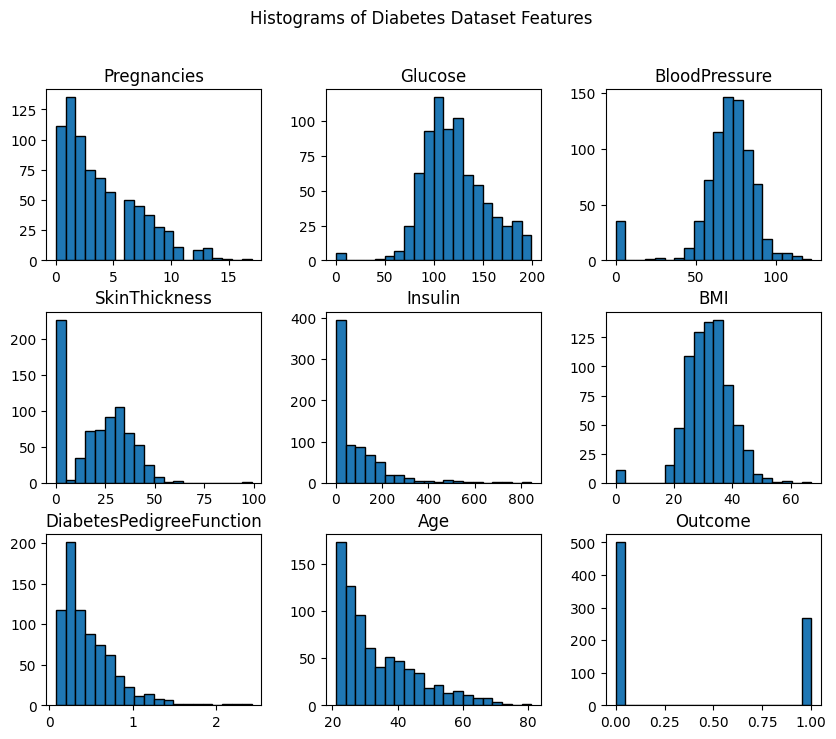

In [9]:
import matplotlib.pyplot as plt

features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
data[features].hist(figsize=(10, 8), bins=20, grid=False, edgecolor='black')
plt.suptitle('Histograms of Diabetes Dataset Features')
plt.show()


In [10]:
#df.drop(columns='Id',axis=1,inplace=True)

In [11]:
outcome = data['Outcome'].value_counts().reset_index()
outcome

,Outcome,count
0,0,500
1,1,268


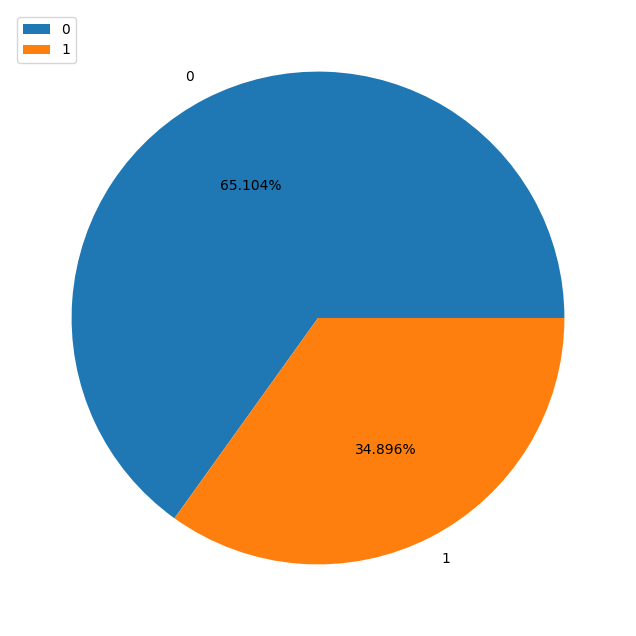

In [12]:
plt.figure(figsize=(8,8))
plt.pie(outcome['count'],labels=['0','1'],autopct='%1.3f%%',explode=[0,0])
plt.legend(loc='upper left')
plt.show()

# **2.3. Pairwise Relationships**
* Use a pairplot to visualize relationships between features.

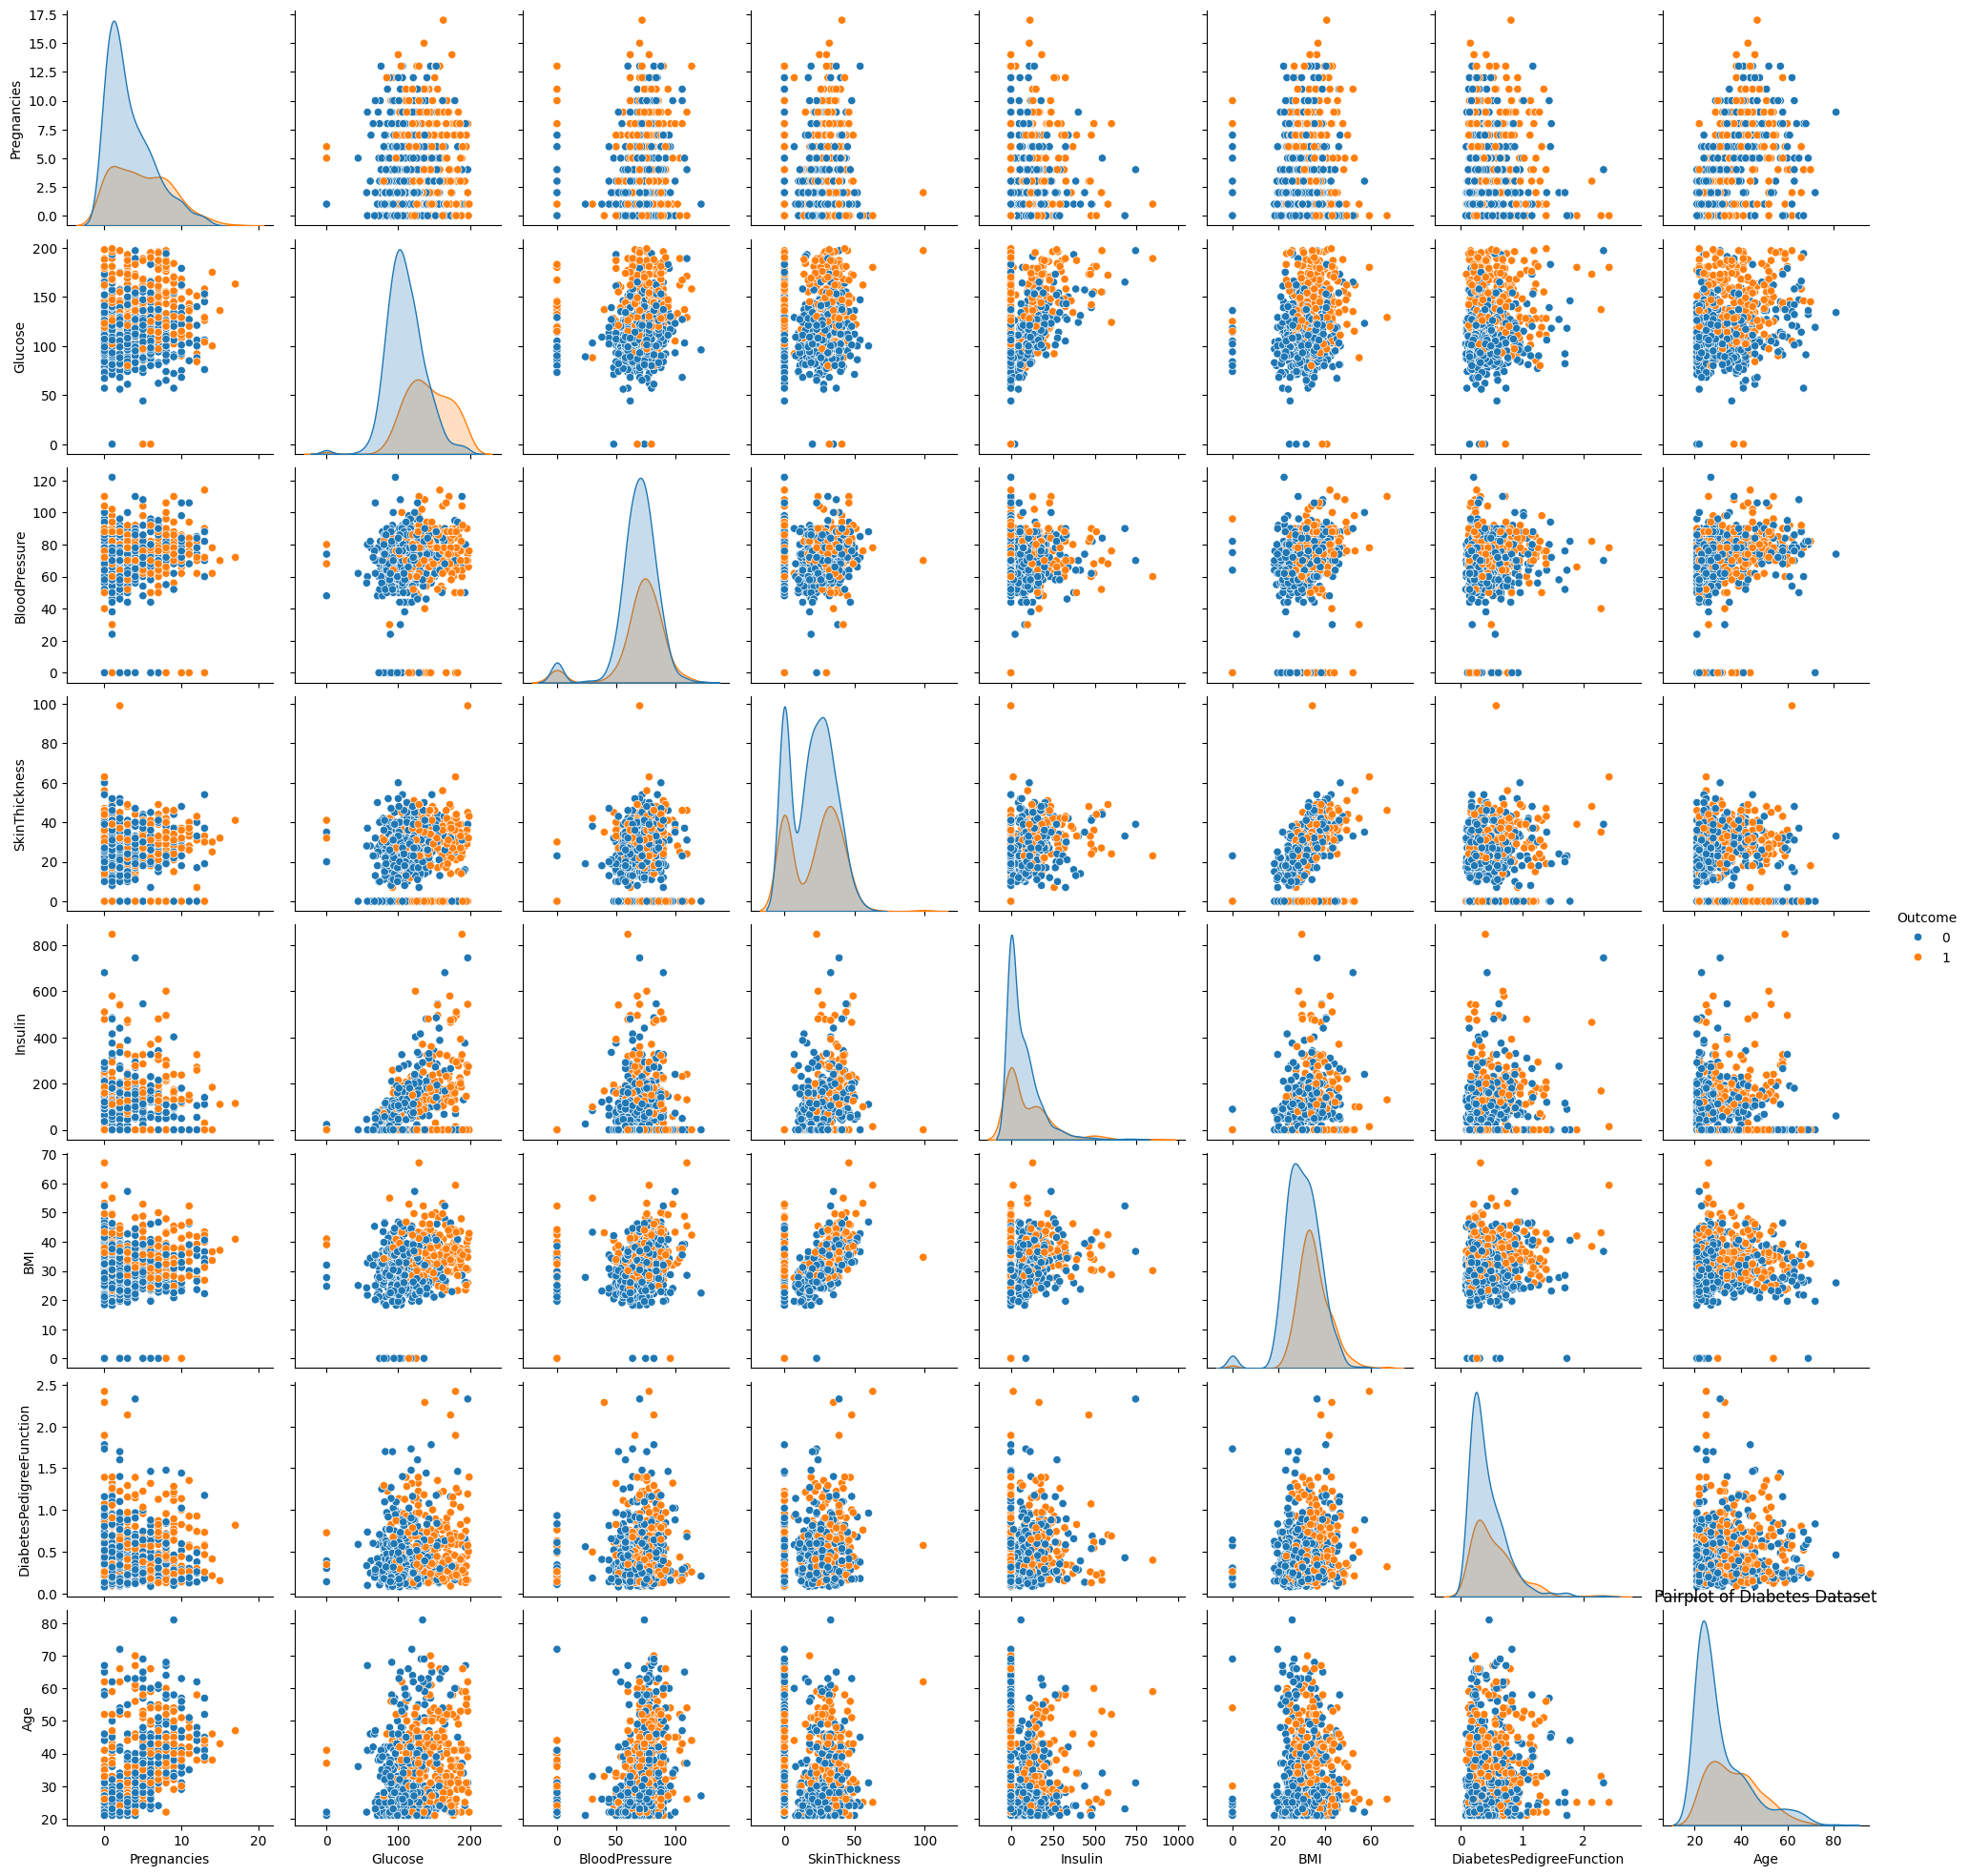

In [13]:
import seaborn as sns

sns.pairplot(data, hue='Outcome')
plt.title('Pairplot of Diabetes Dataset')
plt.show()


# **3. Feature Relationships by Species**
3.1. Boxplots

* Visualize the distribution of features by species using boxplots.

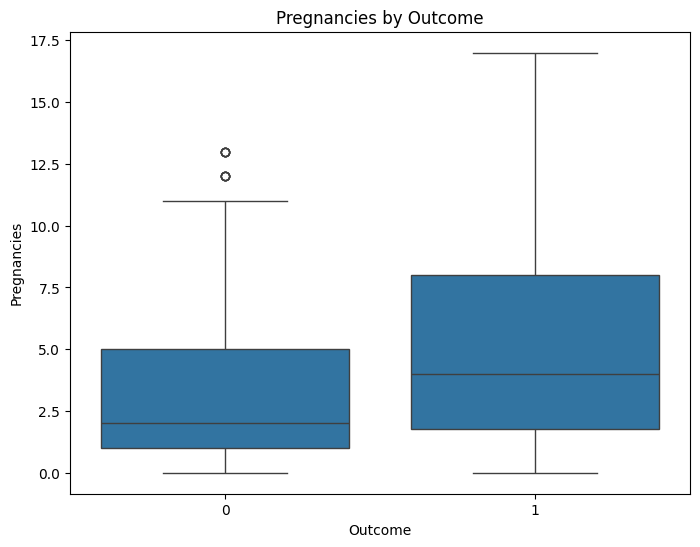

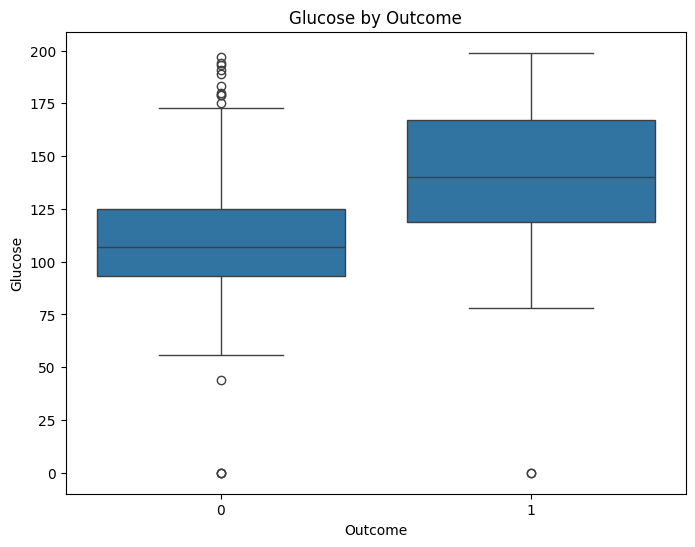

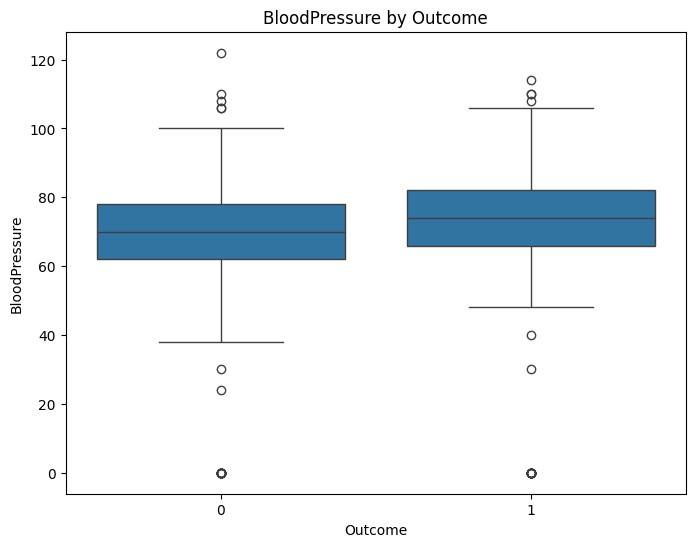

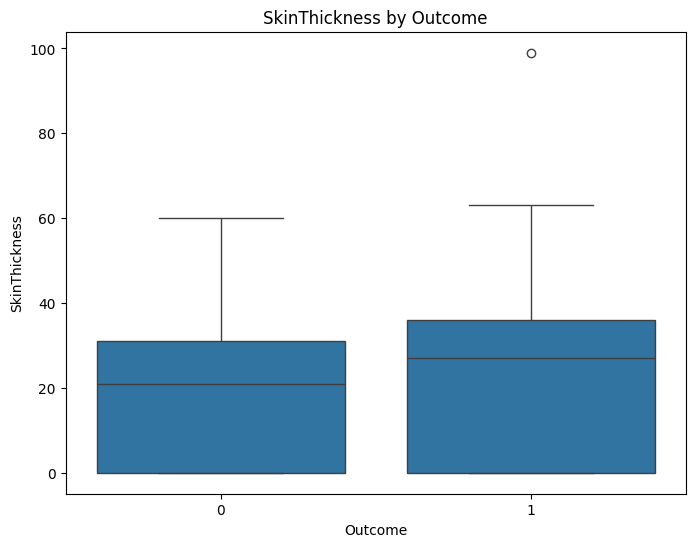

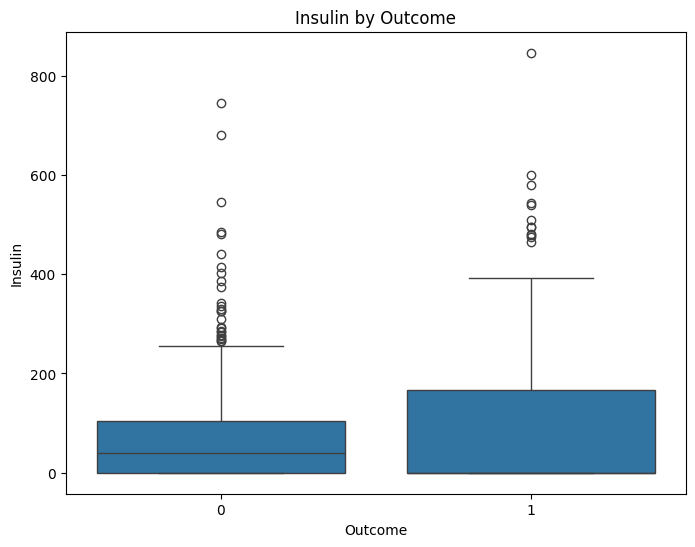

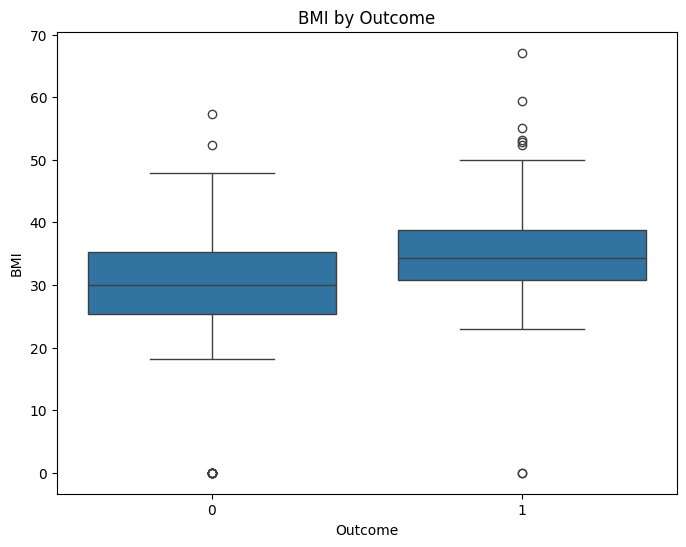

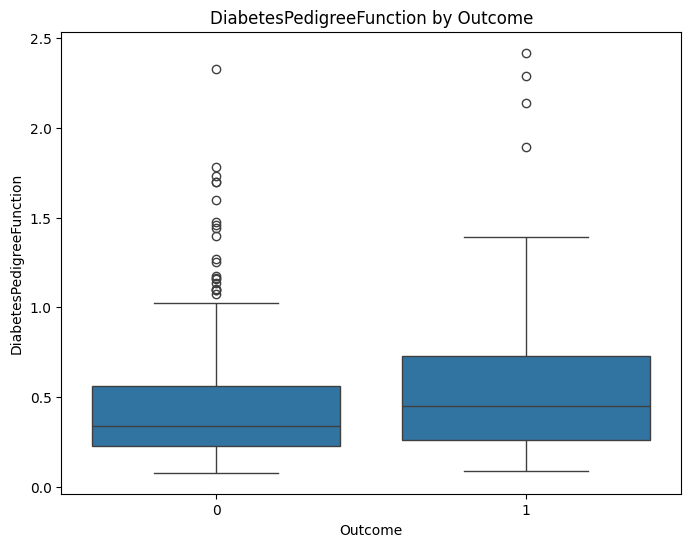

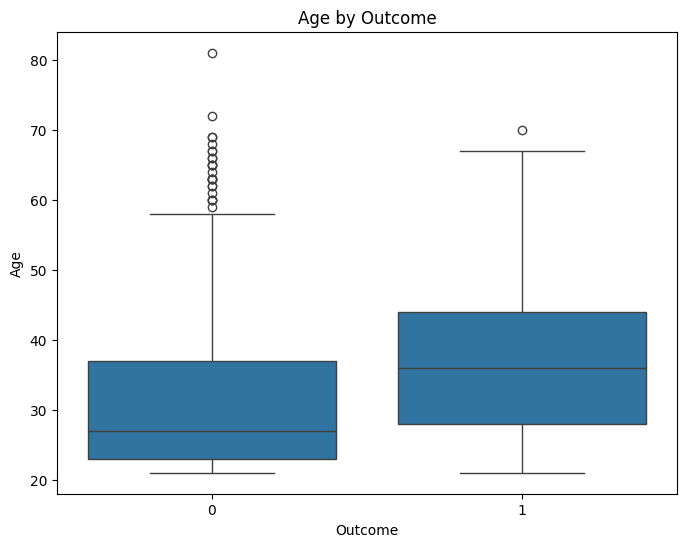

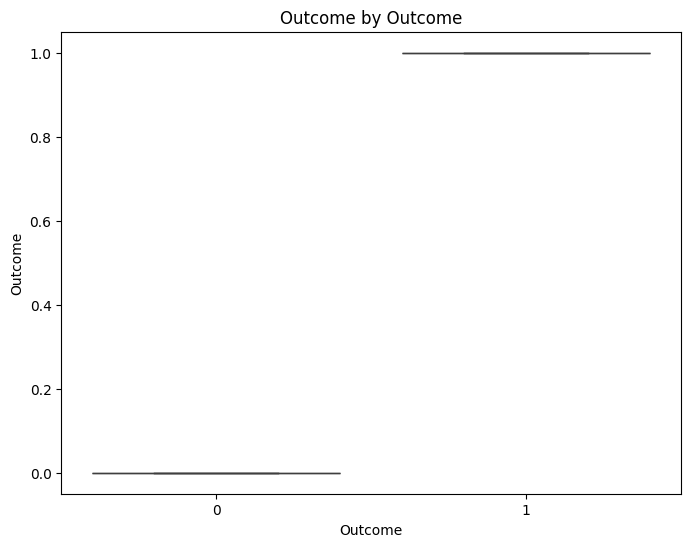

In [14]:
for feature in features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Outcome', y=feature, data=data)
    plt.title(f'{feature} by Outcome')
    plt.show()


3.2. Violin Plots

* Use violin plots to show the distribution of data and density by species.

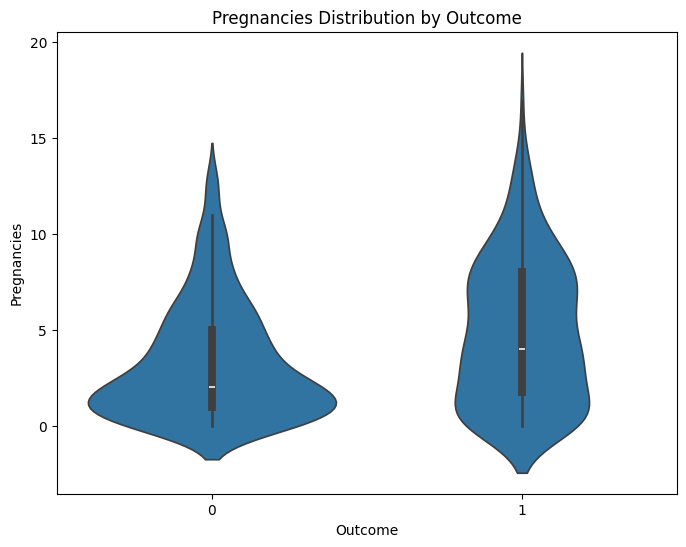

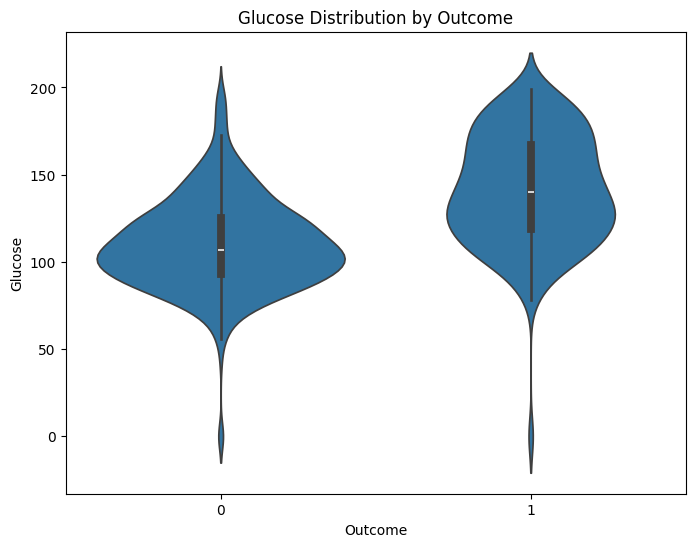

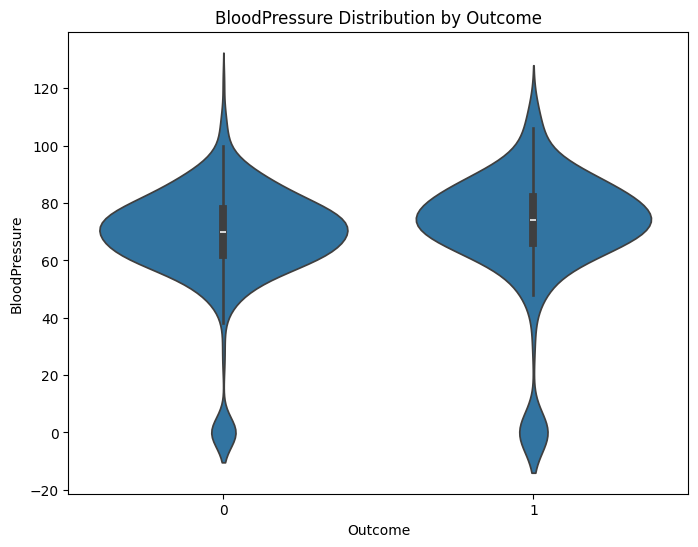

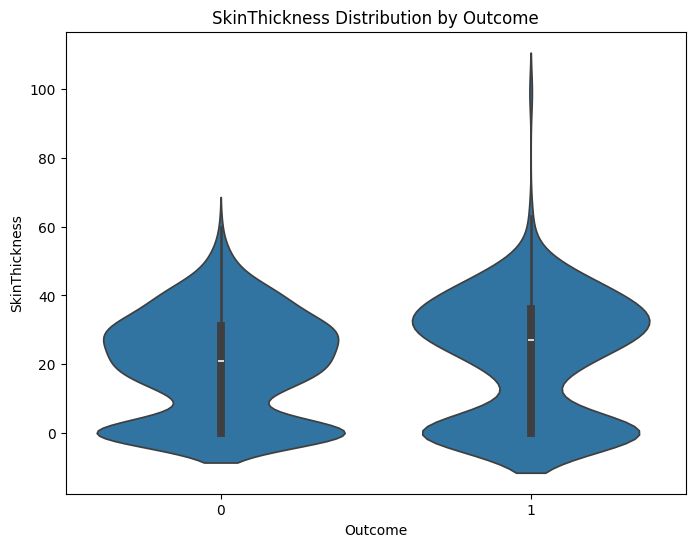

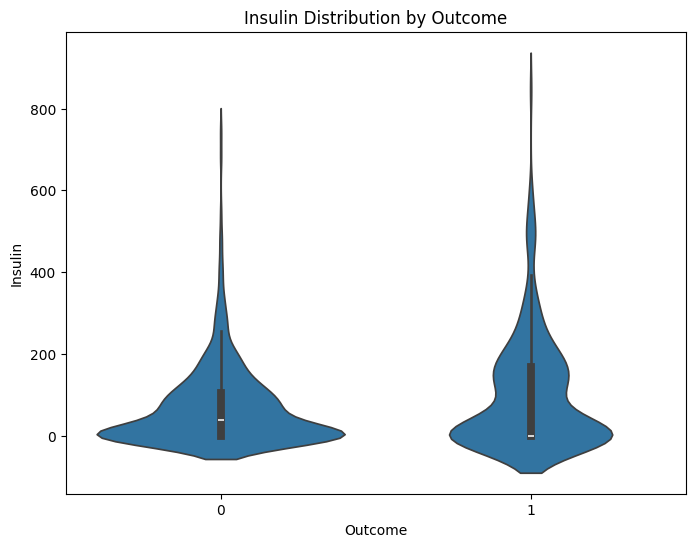

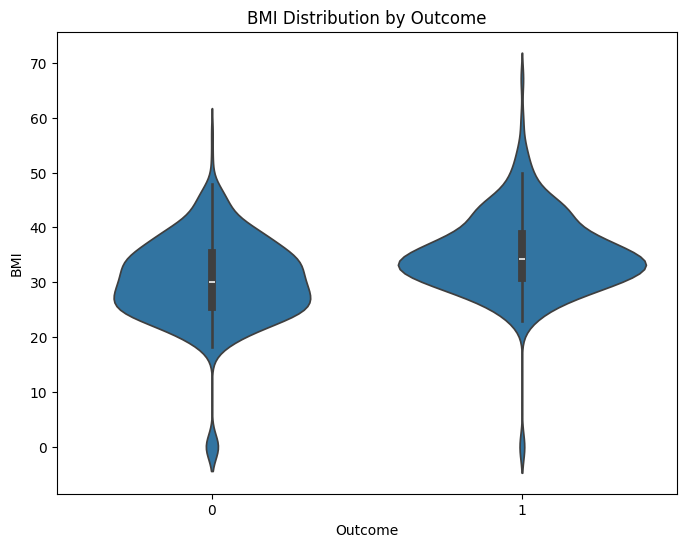

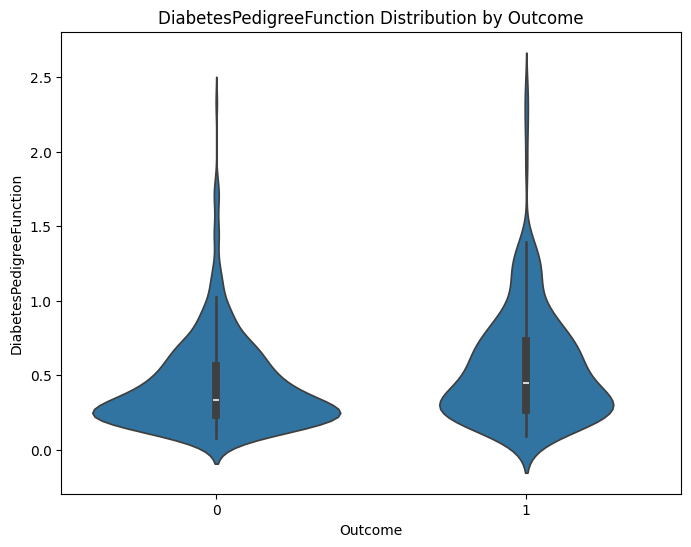

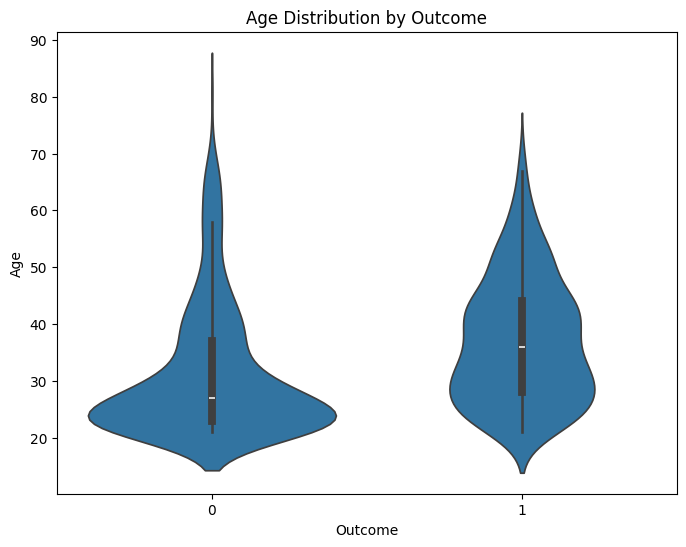

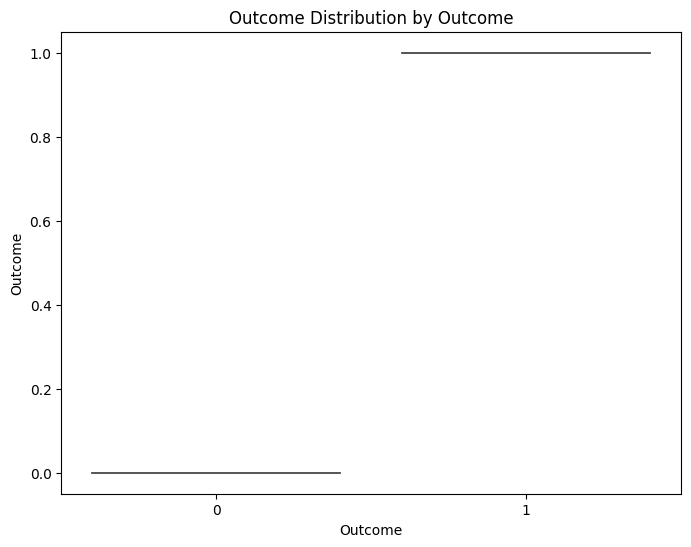

In [15]:
for feature in features:
    plt.figure(figsize=(8, 6))
    sns.violinplot(x='Outcome', y=feature, data=data)
    plt.title(f'{feature} Distribution by Outcome')
    plt.show()


# **4. Advanced Visualization**
4.1. Correlation Heatmap

* Analyze correlations between numerical features.

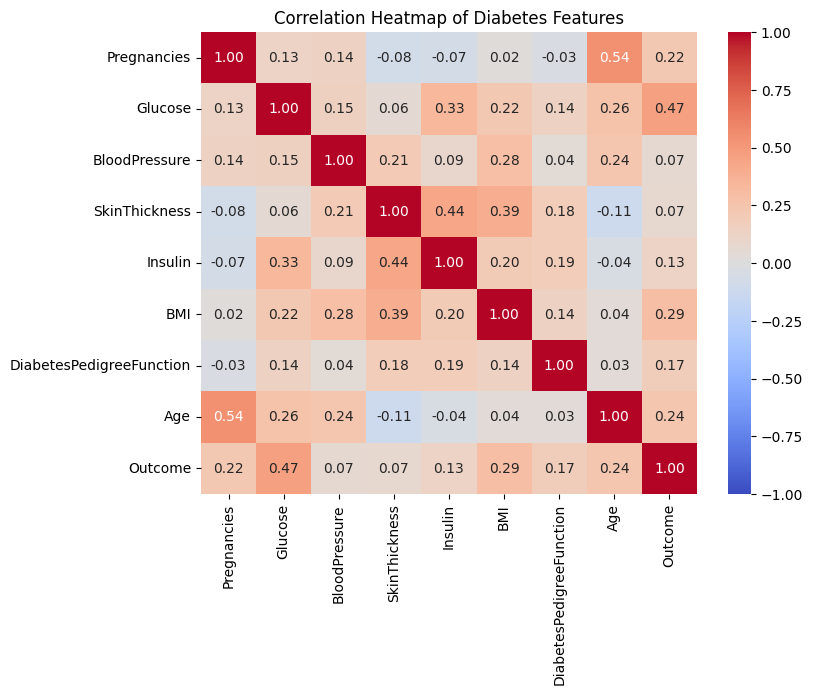

In [16]:
corr = data[features].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Diabetes Features')
plt.show()


4.2. KDE (Kernel Density Estimate) Plots

* Explore the distribution of features using KDE plots.

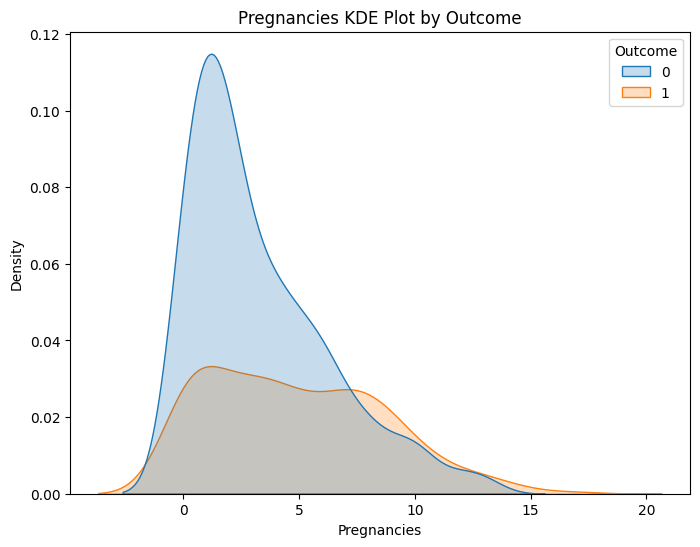

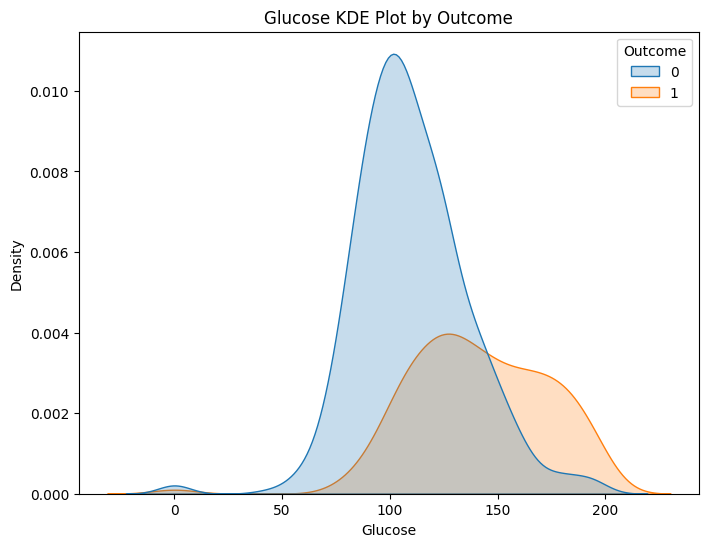

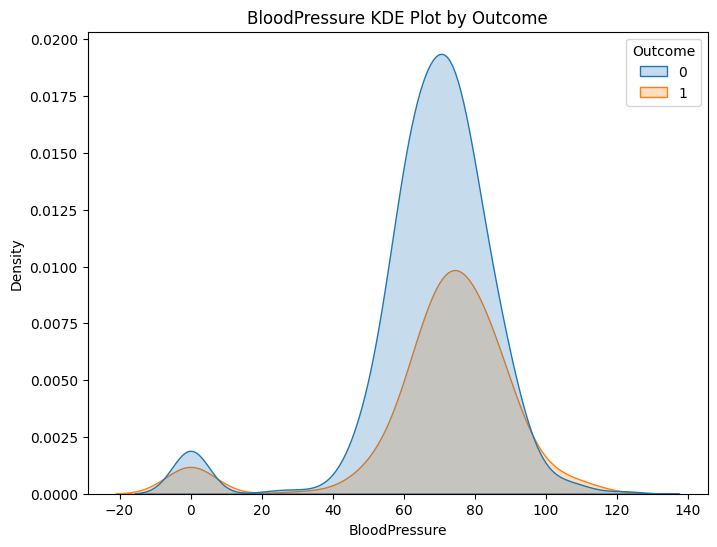

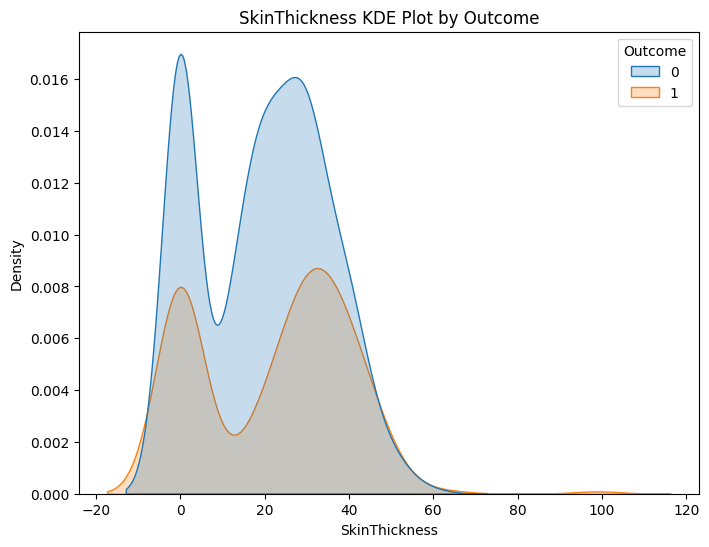

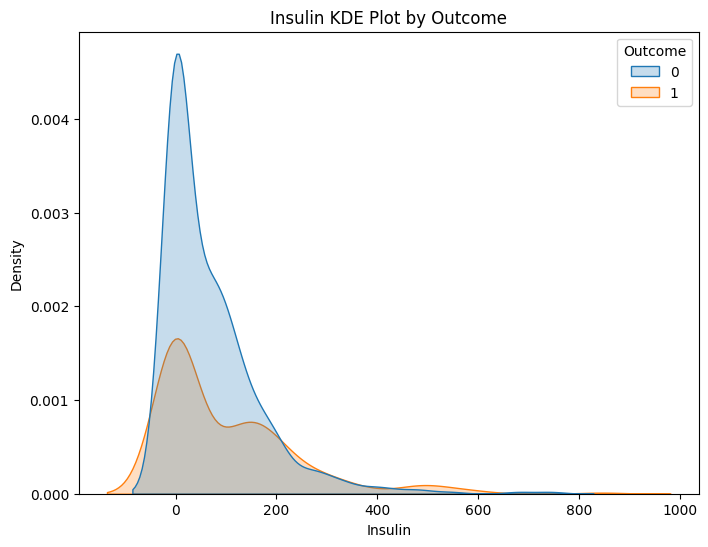

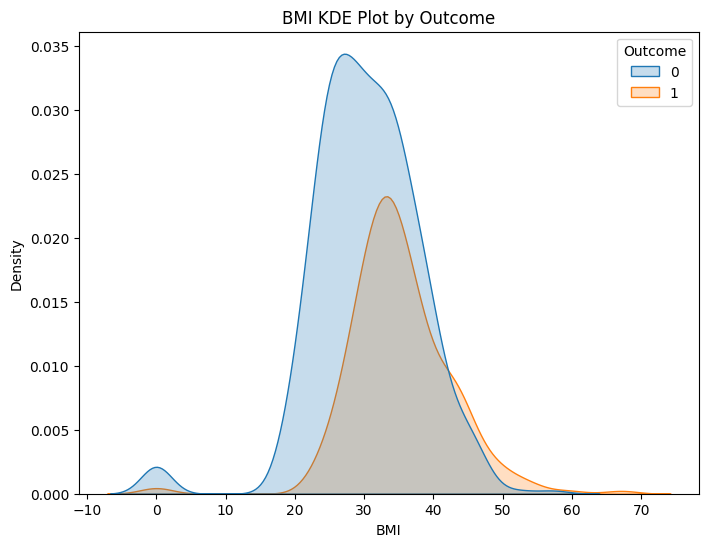

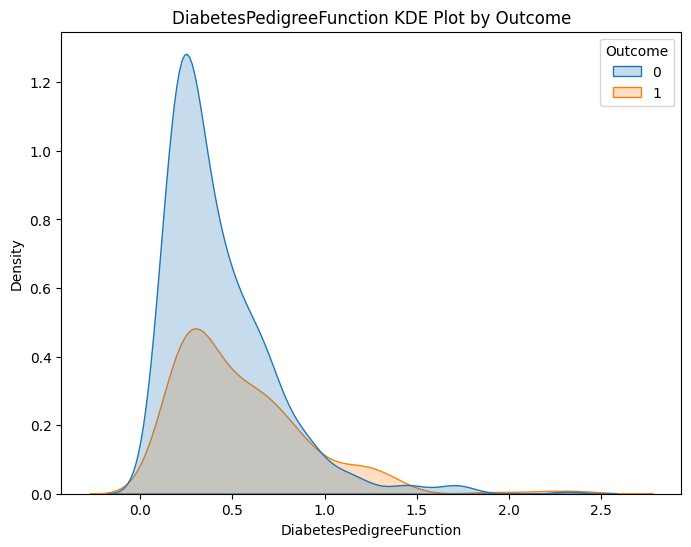

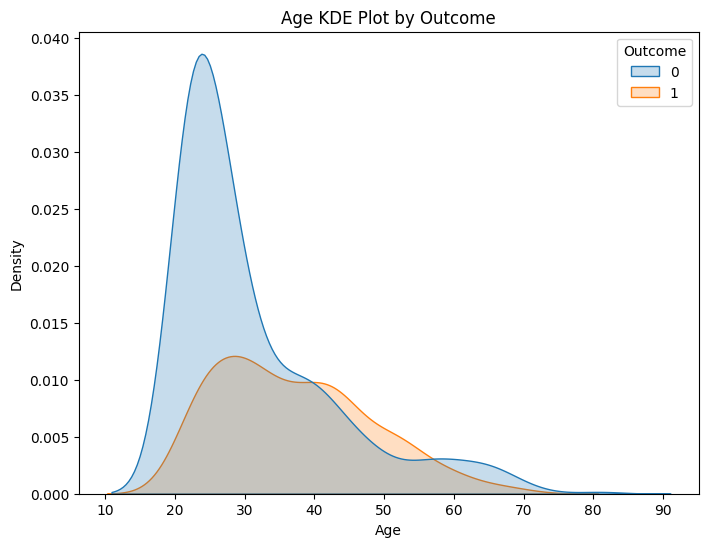

<ipython-input-17-9b6ecedb9412>:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=data, x=feature, hue='Outcome', fill=True)


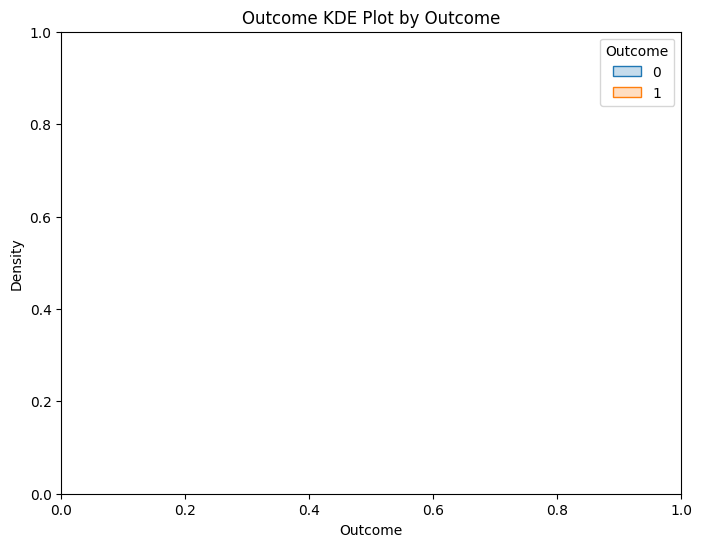

In [17]:
for feature in features:
    plt.figure(figsize=(8, 6))
    sns.kdeplot(data=data, x=feature, hue='Outcome', fill=True)
    plt.title(f'{feature} KDE Plot by Outcome')
    plt.show()


# Modeling

Modeling

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

In [19]:
# label_encoder = LabelEncoder()
# df['Species'] = label_encoder.fit_transform(df['Species'])

In [20]:
data["Outcome"].unique()

array([1, 0])

In [21]:
data['Outcome']

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [22]:
Outcome = data['Outcome'].value_counts().reset_index()
Outcome

,Outcome,count
0,0,500
1,1,268


In [23]:
# - split data test dan training -
y = data['Outcome']
x = data.drop('Outcome',axis=1)
x_train, x_test , y_train , y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

In [24]:
# - Feature Scaling -
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [25]:
# - membuat model knn -
classifier = KNeighborsClassifier(n_neighbors=25)
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=25)

In [26]:
y_pred = classifier.predict(x_test)

In [27]:
# - membuat Confusion Matrix -
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix\n\n', cm)

print('\nTrue Positive(TP) = ', cm[0,0])

print('\nTrue Negative(TN) = ', cm[1,1])

print('\nFalse Positive(FP) = ', cm[0,1])

print('\nFalse Negative(FN) = ', cm[1,0])

Confusion Matrix

 [[98  9]
 [23 24]]

True Positive(TP) =  98

True Negative(TN) =  24

False Positive(FP) =  9

False Negative(FN) =  23


<Axes: >

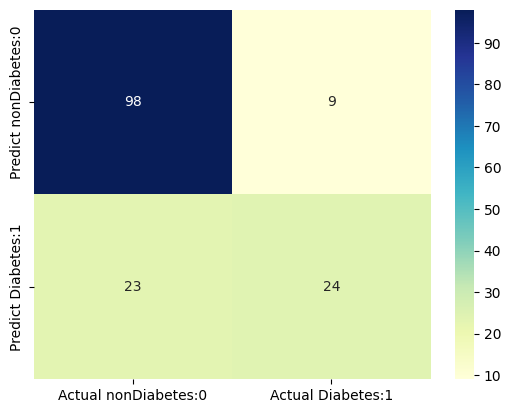

In [28]:
# - menampilkan Heatmap -
cm_matrix = pd.DataFrame(data=cm, columns=['Actual nonDiabetes:0', 'Actual Diabetes:1' ],
                                 index=['Predict nonDiabetes:0', 'Predict Diabetes:1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [29]:
# - menampilkan Accuracy Score -
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

print(classification_report(y_test, y_pred))
print('Accuracy score is: ', accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86       107
           1       0.73      0.51      0.60        47

    accuracy                           0.79       154
   macro avg       0.77      0.71      0.73       154
weighted avg       0.78      0.79      0.78       154

Accuracy score is:  0.7922077922077922


In [30]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [31]:
# deteksi diabetes
classifier.predict(sc.transform([[6,148,	72,	35,	0,	33.6,	0.627,	50]]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1])

# LGBM

In [32]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from lightgbm import LGBMClassifier

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [33]:
from sklearn.ensemble import GradientBoostingClassifier

In [34]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from lightgbm import LGBMClassifier

In [35]:
# - membuat model knn -
classifier2 = GradientBoostingClassifier()
classifier2.fit(x_train, y_train)

GradientBoostingClassifier()

In [36]:
y_pred = classifier2.predict(x_test)

In [37]:
# - membuat Confusion Matrix -
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix\n\n', cm)

print('\nTrue Positive(TP) = ', cm[0,0])

print('\nTrue Negative(TN) = ', cm[1,1])

print('\nFalse Positive(FP) = ', cm[0,1])

print('\nFalse Negative(FN) = ', cm[1,0])

Confusion Matrix

 [[93 14]
 [14 33]]

True Positive(TP) =  93

True Negative(TN) =  33

False Positive(FP) =  14

False Negative(FN) =  14


<Axes: >

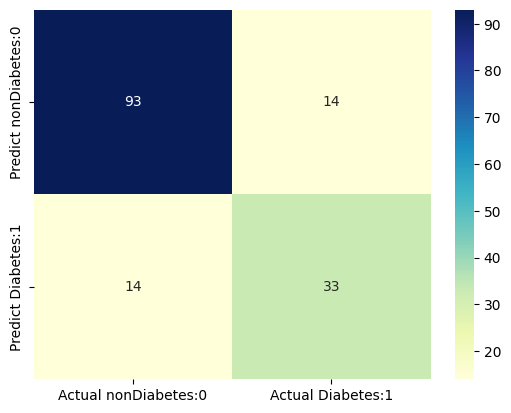

In [38]:
# - menampilkan Heatmap -
cm_matrix = pd.DataFrame(data=cm, columns=['Actual nonDiabetes:0', 'Actual Diabetes:1' ],
                                 index=['Predict nonDiabetes:0', 'Predict Diabetes:1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [39]:
# - menampilkan Accuracy Score -
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

print(classification_report(y_test, y_pred))
print('Accuracy score is: ', accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       107
           1       0.70      0.70      0.70        47

    accuracy                           0.82       154
   macro avg       0.79      0.79      0.79       154
weighted avg       0.82      0.82      0.82       154

Accuracy score is:  0.8181818181818182


In [40]:
import pickle
filename = 'diabetes_model.sav'
pickle.dump(classifier2, open(filename,'wb'))